In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
sns.set()

In [2]:
from google.colab import files
uploaded=files.upload()

Saving spotify.csv to spotify.csv


In [3]:
df=pd.read_csv("spotify.csv")

In [4]:
df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.1780,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.1860,2020
174385,0.795000,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021
174386,0.806000,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.1130,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.7140,2020
174387,0.920000,['Taylor Swift'],0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.000000,0,0.1130,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.3200,2021


#Exploratory Data Analysis (EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [6]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


In [7]:
df.shape

(174389, 19)

#Check the null values in dataset

In [8]:
df.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

#To check duplicated rows

In [9]:
df.duplicated().sum()

2159

Interpretation: We observe that there are 2159 duplicated rows, which donot add any value to the data so we drop them.

#Dropping the duplicated rows

In [10]:
data=df.drop_duplicates()

In [11]:
data

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174379,0.795000,['Alessia Cara'],0.429,144720,0.211,0,45XnLMuqf3vRfskEAMUeCH,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021
174381,0.795000,['Alessia Cara'],0.429,144720,0.211,0,4pPFI9jsguIh3wC7Otoyy8,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021
174383,0.795000,['Alessia Cara'],0.429,144720,0.211,0,52YtxLVUyvtiGPxwwxayHZ,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021
174385,0.795000,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021


In [12]:
df2 = data.drop(columns=['id', 'name', 'artists', 'release_date', 'year'])
df2.corr()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
acousticness,1.000000,-0.264271,-0.088774,-0.749491,-0.210002,0.227291,-0.027457,-0.030235,-0.543954,0.063112,-0.408765,-0.023365,-0.222005,-0.167651
danceability,-0.264271,1.000000,-0.102913,0.206307,0.201590,-0.220737,0.026195,-0.109761,0.250917,-0.046949,0.129071,0.240898,0.005003,0.540981
duration_ms,-0.088774,-0.102913,1.000000,0.059939,-0.034711,0.104049,0.001722,0.029878,0.019935,-0.046627,0.026716,-0.098526,-0.009365,-0.185164
energy,-0.749491,0.206307,0.059939,1.000000,0.103178,-0.180938,0.034958,0.135598,0.778244,-0.054528,0.339694,-0.112943,0.264889,0.327610
explicit,-0.210002,0.201590,-0.034711,0.103178,1.000000,-0.129726,0.005750,0.037508,0.106569,-0.062951,0.155708,0.354561,0.007906,-0.010270
instrumentalness,0.227291,-0.220737,0.104049,-0.180938,-0.129726,1.000000,-0.004676,-0.046246,-0.319948,-0.055884,-0.298125,-0.133987,-0.069760,-0.215892
key,-0.027457,0.026195,0.001722,0.034958,0.005750,-0.004676,1.000000,-0.003498,0.024096,-0.126549,0.002034,0.009937,0.004984,0.024943
liveness,-0.030235,-0.109761,0.029878,0.135598,0.037508,-0.046246,-0.003498,1.000000,0.062828,0.001836,-0.081315,0.122398,0.009003,-0.006889
loudness,-0.543954,0.250917,0.019935,0.778244,0.106569,-0.319948,0.024096,0.062828,1.000000,-0.017954,0.345262,-0.214627,0.216704,0.302749
mode,0.063112,-0.046949,-0.046627,-0.054528,-0.062951,-0.055884,-0.126549,0.001836,-0.017954,1.000000,0.005745,-0.041003,0.003106,0.021915


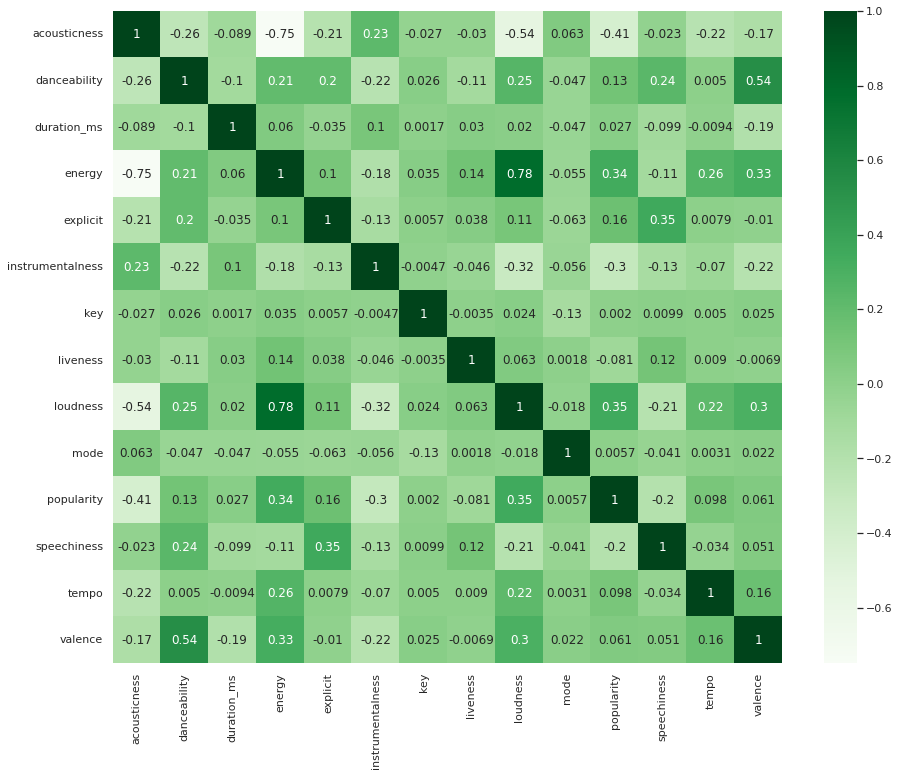

In [13]:
plt.figure(figsize=(15,12))
sns.heatmap(df2.corr(),annot=True,cmap='Greens')
plt.show()

Interpretation: From the above heatmap we observe that energy and  loudness are highly correlated.

In [14]:
len(data)

172230

In [15]:
data.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

#Data Visualization

In [16]:
from matplotlib import cm
color = cm.inferno_r(np.linspace(.4, .8, 30))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


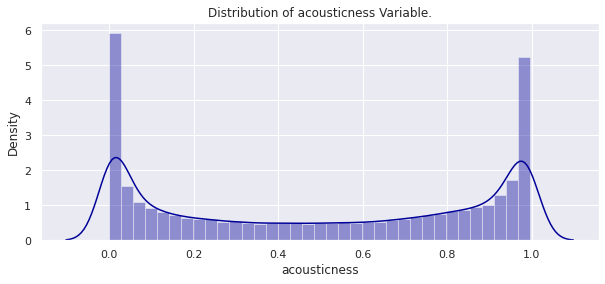

In [17]:
plt.figure(figsize=(10,4))
plt.title("Distribution of acousticness Variable.")
sns.distplot(data['acousticness'],color='#000099');

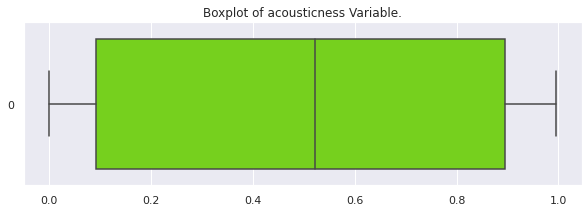

In [18]:
plt.figure(figsize=(10,3))
plt.title("Boxplot of acousticness Variable.")
sns.boxplot(data=data['acousticness'],color='#76EE00',orient='horizontal');

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


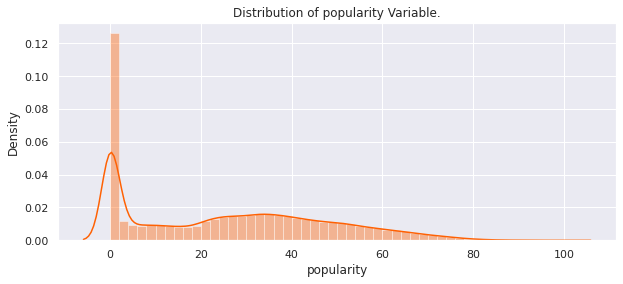

In [19]:
plt.figure(figsize=(10,4))
plt.title("Distribution of popularity Variable.")
sns.distplot(data['popularity'],color='#FF6103');

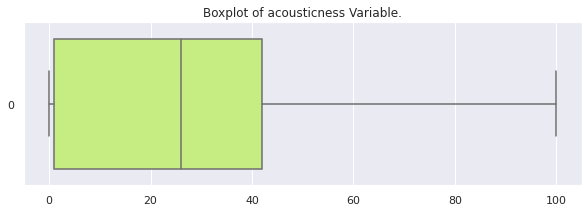

In [20]:
plt.figure(figsize=(10,3))
plt.title("Boxplot of acousticness Variable.")
sns.boxplot(data=data['popularity'],color='#CAFF70',orient='horizontal');

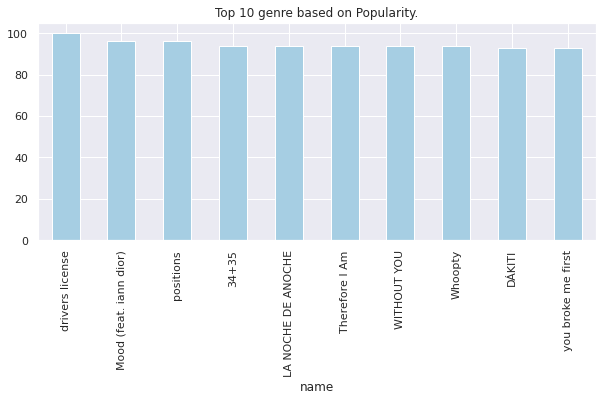

In [21]:
plt.figure(figsize=(10,4))
plt.title("Top 10 genre based on Popularity.")
data.groupby('name').mean()['popularity'].sort_values(ascending=False).head(10).plot(kind='bar',colormap='Paired');

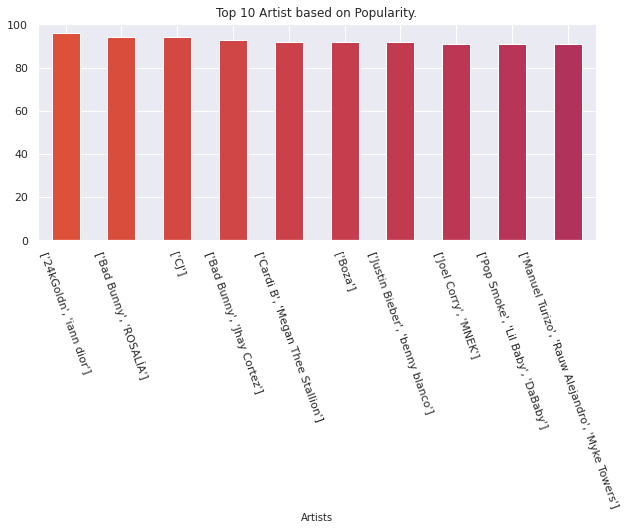

In [22]:
plt.figure(figsize=(10,4))
plt.title("Top 10 Artist based on Popularity.")
data.groupby('artists').mean()['popularity'].sort_values(ascending=False).head(10).plot(kind='bar',color=color,stacked=True)
plt.xlabel('Artists',fontsize=10)
plt.xticks(rotation=-70);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


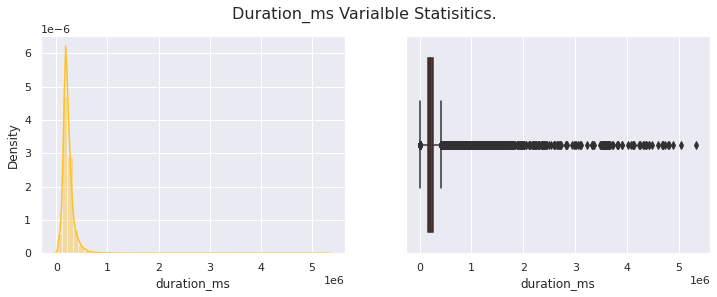

In [23]:
plt.figure(figsize=(12,4))
plt.suptitle("Duration_ms Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(data['duration_ms'],color='#FFC125')
plt.subplot(1,2,2)
sns.boxplot(data['duration_ms'],color='#8B1A1A');

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


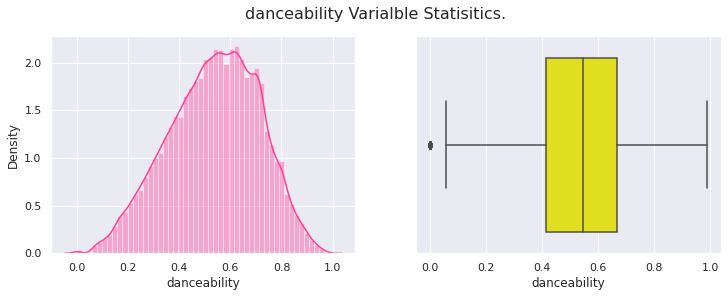

In [24]:
plt.figure(figsize=(12,4))
plt.suptitle("danceability Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(data['danceability'],color='#FF3E96')
plt.subplot(1,2,2)
sns.boxplot(data['danceability'],color='#FFFF00');

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


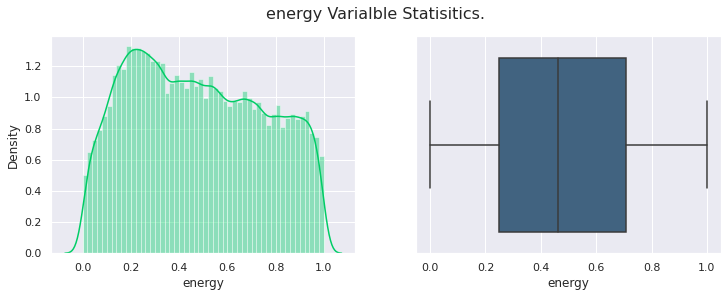

In [25]:
plt.figure(figsize=(12,4))
plt.suptitle("energy Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(data['energy'],color='#00CD66')
plt.subplot(1,2,2)
sns.boxplot(data['energy'],color='#36648B');

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


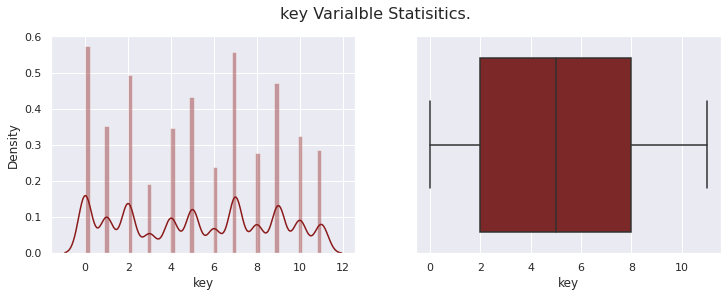

In [26]:
plt.figure(figsize=(12,4))
plt.suptitle("key Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(data['key'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(data['key'],color='#8B1A1A');

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


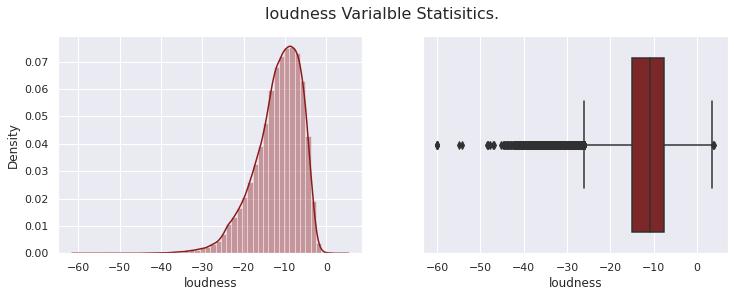

In [27]:
plt.figure(figsize=(12,4))
plt.suptitle("loudness Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(data['loudness'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(data['loudness'],color='#8B1A1A');

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


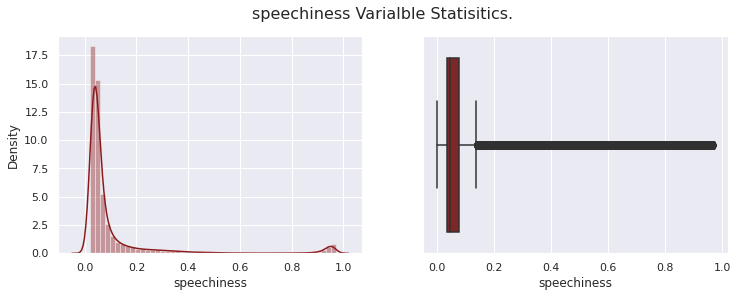

In [28]:
plt.figure(figsize=(12,4))
plt.suptitle("speechiness Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(data['speechiness'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(data['speechiness'],color='#8B1A1A');

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


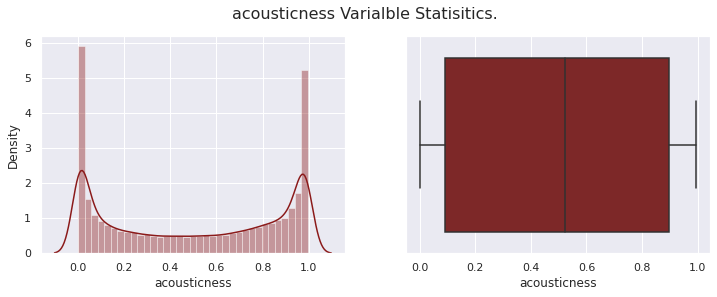

In [29]:
plt.figure(figsize=(12,4))
plt.suptitle("acousticness Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(data['acousticness'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(data['acousticness'],color='#8B1A1A');

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


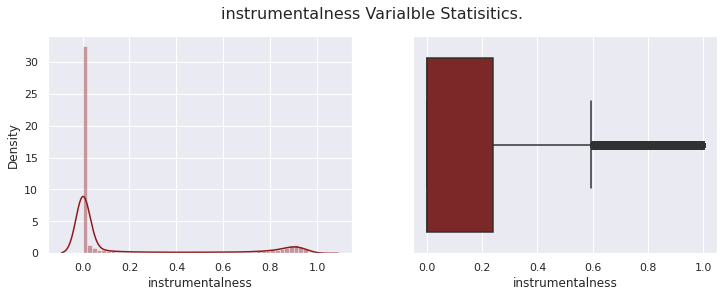

In [30]:
plt.figure(figsize=(12,4))
plt.suptitle("instrumentalness Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(data['instrumentalness'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(data['instrumentalness'],color='#8B1A1A');

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


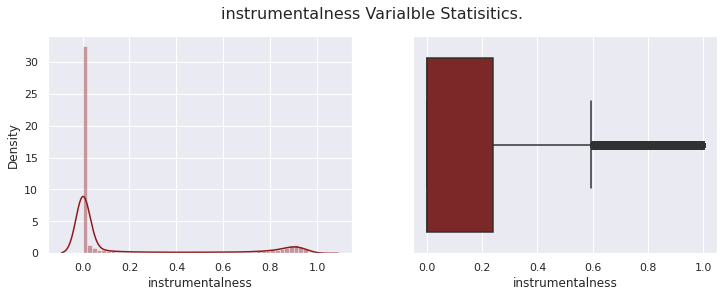

In [31]:
plt.figure(figsize=(12,4))
plt.suptitle("instrumentalness Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(data['instrumentalness'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(data['instrumentalness'],color='#8B1A1A');

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


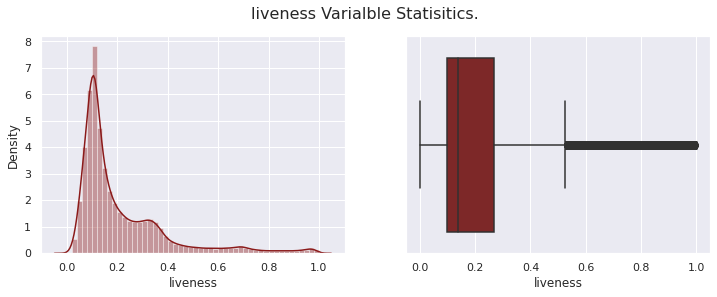

In [32]:
plt.figure(figsize=(12,4))
plt.suptitle("liveness Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(data['liveness'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(data['liveness'],color='#8B1A1A');

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


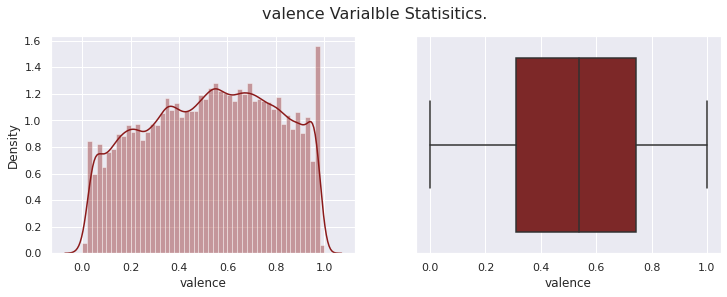

In [33]:
plt.figure(figsize=(12,4))
plt.suptitle("valence Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(data['valence'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(data['valence'],color='#8B1A1A');

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


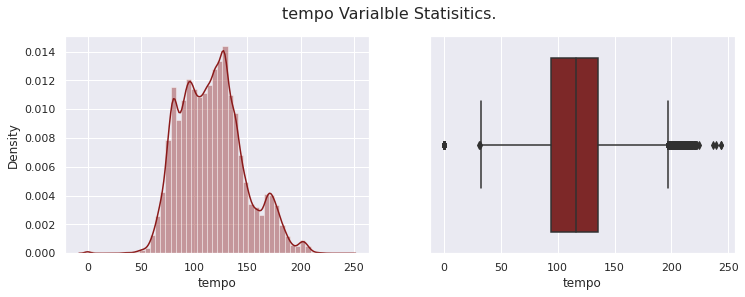

In [34]:
plt.figure(figsize=(12,4))
plt.suptitle("tempo Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(data['tempo'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(data['tempo'],color='#8B1A1A');

#MODEL BUILDING

In [35]:
from sklearn.preprocessing import MinMaxScaler
datatypes=['int16','int32','int64','float16','float32','float64']
normalization = data.select_dtypes(include=datatypes)
for col in normalization.columns: 
  MinMaxScaler(col)

In [36]:
from sklearn.cluster import KMeans

In [37]:
TWSS = []
k=list(range(1,15))

for i in k:
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(df2)
  TWSS.append(kmeans.inertia_)

Text(0, 0.5, 'total_within_SS')

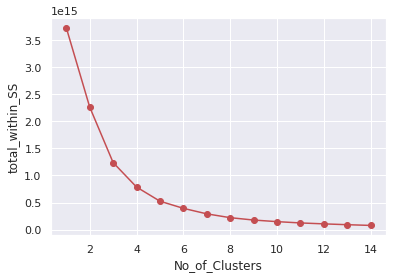

In [38]:
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [39]:
from sklearn.cluster import KMeans
kmeans =KMeans(n_clusters=10)
features=kmeans.fit_predict(normalization)
data['features']=features
MinMaxScaler(data['features'])

<ipython-input-39-dbda9316c152>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['features']=features


MinMaxScaler(feature_range=0         6
1         6
2         6
3         7
4         6
         ..
174379    6
174381    6
174383    6
174385    6
174387    0
Name: features, Length: 172230, dtype: int32)

In [40]:
model=KMeans(n_clusters=10)
model.fit(df2)


KMeans(n_clusters=10)

In [41]:
model.labels_#getting the labels of clusters assigned to each rows
mb=pd.Series(model.labels_)#converting numpy array into pandas series object
df2['clust']=mb# creating a new column and assigning it to new column

In [42]:
df2.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,clust
0,0.991000,0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,12,0.0936,149.976,0.6340,2.0
1,0.643000,0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,7,0.0534,86.889,0.9500,2.0
2,0.993000,0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,4,0.1740,97.600,0.6890,2.0
3,0.000173,0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,17,0.0425,127.997,0.0422,9.0
4,0.295000,0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,2,0.0768,122.076,0.2990,2.0


In [43]:
df2=pd.concat([df2,data['name']],axis=1)

In [44]:
df2.dropna()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,clust,name
0,0.991000,0.598,168333,0.22400,0,0.000522,5,0.3790,-12.628,0,12,0.0936,149.976,0.6340,2.0,Keep A Song In Your Soul
1,0.643000,0.852,150200,0.51700,0,0.026400,5,0.0809,-7.261,0,7,0.0534,86.889,0.9500,2.0,I Put A Spell On You
2,0.993000,0.647,163827,0.18600,0,0.000018,0,0.5190,-12.098,1,4,0.1740,97.600,0.6890,2.0,Golfing Papa
3,0.000173,0.730,422087,0.79800,0,0.801000,2,0.1280,-7.311,1,17,0.0425,127.997,0.0422,9.0,True House Music - Xavier Santos & Carlos Gomi...
4,0.295000,0.704,165224,0.70700,1,0.000246,10,0.4020,-6.036,0,2,0.0768,122.076,0.2990,2.0,Xuniverxe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172225,0.429000,0.465,227291,0.85400,1,0.000000,7,0.6180,-7.564,1,50,0.3770,85.126,0.1990,2.0,Keisha's Song (Her Pain) (feat. Ashtro Bot)
172226,0.000397,0.353,176427,0.95300,0,0.076300,0,0.1810,-7.277,0,0,0.2070,188.355,0.5450,2.0,Make A Circuit Me (Re-recorded / Remastered)
172227,0.298000,0.355,294813,0.53600,0,0.000000,1,0.1450,-7.202,1,48,0.0461,147.878,0.2650,2.0,Let The Church Say Amen - Radio Edit
172228,0.010300,0.814,465048,0.70100,0,0.007750,7,0.1320,-7.525,1,2,0.0376,114.998,0.7860,2.0,White Lines - Re-Recorded


In [45]:
df2[df2['clust']==0]

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,clust,name
12,0.99200,0.353,285707,0.396,0,0.924000,1,0.3120,-14.053,1,0,0.0447,111.268,0.566,0.0,Ta oula sou
13,0.00478,0.643,304078,0.998,0,0.476000,1,0.1050,-6.120,1,0,0.0566,124.018,0.639,0.0,Schumacher
14,0.99300,0.453,255520,0.410,0,0.160000,2,0.2920,-10.469,1,0,0.0440,67.271,0.894,0.0,Mparmpaouzos
15,0.97900,0.525,258167,0.433,0,0.111000,2,0.1340,-11.426,1,0,0.0488,102.578,0.792,0.0,To katinaki
16,0.97200,0.528,277720,0.325,0,0.023400,11,0.1020,-12.508,1,0,0.0421,118.562,0.146,0.0,Oli mera paizei zaria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172186,0.59000,0.516,222093,0.439,0,0.000000,2,0.1620,-6.754,1,0,0.0267,83.943,0.292,0.0,I'm Still Here
172188,0.54200,0.447,250867,0.585,0,0.000005,4,0.1160,-8.383,1,2,0.0364,203.891,0.415,0.0,ไม่เห็นฝุ่น
172189,0.94700,0.623,184320,0.170,0,0.964000,10,0.0902,-15.200,1,51,0.0397,116.602,0.434,0.0,Have Yourself A Merry Little Christmas (feat. ...
172214,0.03790,0.792,297665,0.847,0,0.000000,2,0.2850,-6.266,1,1,0.1260,111.438,0.505,0.0,My Prerogative - Re-Recorded


In [46]:
df2[df2['clust']==1]

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,clust,name
708,0.984000,0.372,1031014,0.0909,0,0.854000,2,0.0770,-24.959,1,0,0.0557,71.866,0.1010,1.0,Rhapsody in Blue (for piano 4 hands)
3421,0.963000,0.228,1205133,0.1490,0,0.013400,1,0.0892,-18.158,1,0,0.0404,130.715,0.0363,1.0,"Starke Scheite schichtet mir dort (Brünnhilde,..."
3495,0.423000,0.611,1002107,0.3870,0,0.842000,9,0.0998,-15.965,0,11,0.0785,116.467,0.3850,1.0,Honeysuckle Rose - Live
4440,0.933000,0.118,1001307,0.1230,0,0.702000,2,0.2470,-19.084,1,0,0.0407,73.037,0.0697,1.0,"Symphony No. 6 in B Minor, Op 74 ""Pathétique"":..."
4525,0.701000,0.286,1255747,0.3410,0,0.123000,1,0.1640,-9.024,1,2,0.0353,123.756,0.0767,1.0,El Tholathya Al Moqadasa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167116,0.493000,0.544,240400,0.4800,0,0.000023,7,0.0596,-9.760,1,33,0.0347,207.656,0.6830,1.0,Hold You
168165,0.585000,0.849,129245,0.5210,0,0.000000,10,0.1060,-7.746,0,33,0.0337,105.562,0.9050,1.0,The Birds and the Bees
168191,0.000288,0.484,186960,0.9790,0,0.892000,4,0.0470,-6.986,0,30,0.0404,111.397,0.6830,1.0,Bullet
168653,0.386000,0.711,367493,0.2980,0,0.624000,1,0.1730,-21.713,1,38,0.0872,172.453,0.2170,1.0,Original Bedroom Rockers


In [47]:
df2[df2['clust']==2]

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,clust,name
0,0.991000,0.598,168333,0.2240,0,0.000522,5,0.3790,-12.628,0,12,0.0936,149.976,0.634,2.0,Keep A Song In Your Soul
1,0.643000,0.852,150200,0.5170,0,0.026400,5,0.0809,-7.261,0,7,0.0534,86.889,0.950,2.0,I Put A Spell On You
2,0.993000,0.647,163827,0.1860,0,0.000018,0,0.5190,-12.098,1,4,0.1740,97.600,0.689,2.0,Golfing Papa
4,0.295000,0.704,165224,0.7070,1,0.000246,10,0.4020,-6.036,0,2,0.0768,122.076,0.299,2.0,Xuniverxe
6,0.992000,0.782,195200,0.0573,0,0.000002,5,0.1760,-12.453,1,5,0.0592,85.652,0.487,2.0,Don't You Advertise Your Man
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172224,0.015600,0.662,222672,0.7510,0,0.001010,5,0.0999,-8.430,1,1,0.2500,190.077,0.844,2.0,I Got It Made - Re-Recorded
172225,0.429000,0.465,227291,0.8540,1,0.000000,7,0.6180,-7.564,1,50,0.3770,85.126,0.199,2.0,Keisha's Song (Her Pain) (feat. Ashtro Bot)
172226,0.000397,0.353,176427,0.9530,0,0.076300,0,0.1810,-7.277,0,0,0.2070,188.355,0.545,2.0,Make A Circuit Me (Re-recorded / Remastered)
172227,0.298000,0.355,294813,0.5360,0,0.000000,1,0.1450,-7.202,1,48,0.0461,147.878,0.265,2.0,Let The Church Say Amen - Radio Edit


In [48]:
df2[df2['clust']==3]

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,clust,name
27073,0.891000,0.446,145067,0.332,0,0.001490,2,0.1590,-10.845,1,30,0.0328,125.302,0.5890,3.0,You Are My One Desire
36718,0.130000,0.693,244107,0.594,0,0.000000,1,0.1150,-6.408,1,58,0.0325,123.932,0.1920,3.0,Realize
36950,0.001370,0.663,219253,0.977,0,0.000018,0,0.1730,-3.024,1,62,0.0575,129.975,0.7460,3.0,Something in Your Mouth
36970,0.001790,0.648,273827,0.516,0,0.000000,10,0.0772,-8.869,0,57,0.0490,89.828,0.0756,3.0,Can't Believe It (feat. Lil' Wayne)
36976,0.005750,0.569,188960,0.745,0,0.000049,2,0.2790,-3.854,1,61,0.1820,91.533,0.7140,3.0,Never Wanted To Dance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140456,0.005520,0.782,209293,0.928,0,0.392000,0,0.0878,-8.212,1,3,0.0861,132.048,0.8620,3.0,Can't Get Used To Losing You - Marvel & Eli's ...
140478,0.000002,0.401,83469,0.974,0,0.750000,11,0.1690,-11.491,1,7,0.0569,138.007,0.3100,3.0,Platitude [ASOT 332] - Original Mix
140544,0.000225,0.476,324680,0.982,0,0.668000,11,0.0774,-5.746,0,0,0.0569,136.017,0.1590,3.0,L'Acrobat
150324,0.626000,0.888,190733,0.820,0,0.807000,7,0.0454,-11.057,1,24,0.0478,110.091,0.9610,3.0,Brother Man


In [49]:
df2[df2['clust']==4]

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,clust,name
9,0.006820,0.5710,476304,0.7530,0,0.873000,8,0.0920,-6.943,1,0,0.0446,126.993,0.1190,4.0,Broken Puppet - Original Mix
31,0.032300,0.6970,489012,0.6170,0,0.902000,11,0.1490,-9.510,0,0,0.0609,133.982,0.3210,4.0,Day After - Original Mix
38,0.001740,0.6020,496170,0.5920,0,0.898000,1,0.1080,-10.421,1,0,0.0439,133.992,0.3960,4.0,Headbanger - Original Mix
45,0.000017,0.4900,454776,0.9220,0,0.855000,1,0.1230,-11.961,1,0,0.0771,158.049,0.2640,4.0,Quantum Fluctuation
95,0.983000,0.2120,451500,0.0148,1,0.727000,2,0.6990,-33.187,0,0,0.0434,76.734,0.0399,4.0,Descuernacabras (Live)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171475,0.955000,0.0629,272787,0.0718,0,0.907000,8,0.0906,-24.789,0,50,0.0432,67.250,0.0324,4.0,A Meaningful Moment Through a Meaning(less) Pr...
171497,0.557000,0.6560,181813,0.4680,0,0.000001,2,0.1500,-6.674,1,46,0.0351,115.418,0.9210,4.0,Todo Por Servir Se Acaba
171609,0.000262,0.3560,313347,0.9660,0,0.148000,7,0.1920,-4.130,0,58,0.0825,173.992,0.2150,4.0,Propane Nightmares
171668,0.001350,0.5480,333027,0.8350,0,0.405000,1,0.1860,-9.855,0,0,0.1960,174.003,0.1800,4.0,Sunday Blues - Drum N Bass Mix


In [50]:
df2[df2['clust']==5]

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,clust,name
51,0.36500,0.565,128500,0.2550,1,0.000287,10,0.3210,-30.644,1,0,0.0480,94.519,0.7250,5.0,Indios Cheroqui (Live) [feat. Ariel Flores & S...
55,0.43500,0.680,88696,0.9390,0,0.879000,6,0.0924,-5.458,1,0,0.0649,183.958,0.9240,5.0,Playground Sparks
72,0.08280,0.854,77477,0.5550,1,0.315000,10,0.0883,-8.474,0,0,0.0747,81.015,0.5430,5.0,Trap em Casa
73,0.77600,0.792,129287,0.5320,0,0.000000,2,0.1600,-15.461,0,1,0.3280,122.403,0.5450,5.0,Nugget
74,0.21400,0.890,117816,0.4130,1,0.000000,1,0.1390,-9.613,1,0,0.2260,92.484,0.3080,5.0,Wock(y)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172120,0.22000,0.601,242120,0.5880,0,0.000007,4,0.1990,-6.114,1,0,0.0400,126.045,0.4750,5.0,Just Go
172121,0.09720,0.774,203667,0.8170,0,0.000002,7,0.1430,-3.076,1,52,0.0338,93.011,0.8340,5.0,The Bomb
172125,0.16100,0.680,404080,0.5330,0,0.753000,10,0.3190,-10.572,0,51,0.0391,99.946,0.4120,5.0,Animus Vox
172191,0.99100,0.474,117673,0.0118,0,0.891000,9,0.0622,-31.108,0,57,0.0318,79.100,0.0656,5.0,Extremely Loud and Incredibly Close


In [51]:
df2[df2['clust']==6]

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,clust,name
22,0.08080,0.389,774360,0.81000,0,0.918000,1,0.3320,-11.132,1,0,0.1090,161.322,0.0710,6.0,Big Rip
201,0.98200,0.279,831667,0.21100,0,0.878000,10,0.6650,-20.096,1,4,0.0366,80.954,0.0594,6.0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ..."
229,0.50500,0.233,686664,0.00817,0,0.000203,8,0.1090,-37.311,1,3,0.0305,108.143,0.1850,6.0,Raja Manggala
236,0.98200,0.279,831667,0.21100,0,0.878000,10,0.6650,-20.096,1,1,0.0366,80.954,0.0594,6.0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ..."
280,0.97300,0.200,673733,0.09160,0,0.875000,5,0.0756,-22.312,0,0,0.0376,65.211,0.0515,6.0,III. Allegro scherzando
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169972,0.00179,0.151,267573,0.85400,0,0.000851,8,0.0878,-4.508,0,48,0.0520,181.264,0.2870,6.0,Run To The Water
170142,0.00564,0.821,341121,0.89200,0,0.121000,10,0.0416,-12.660,0,0,0.0566,137.141,0.4260,6.0,Stormy
170809,0.00792,0.698,482752,0.46100,0,0.821000,11,0.4650,-11.945,0,0,0.0383,119.996,0.2200,6.0,Catatonia - Kriece's Lucid Dreaming Remix
170895,0.03700,0.465,185000,0.90000,0,0.007660,7,0.4510,-6.592,1,0,0.0450,134.532,0.8900,6.0,Blow Up!


In [52]:
class Spotify_Recommendation():
    def __init__(self, dataset):
        self.dataset = dataset
    def recommend(self, songs, amount=1):
        distance = []
        song = self.dataset[(self.dataset.name.str.lower() == songs.lower())].head(1).values[0]
        rec = self.dataset[self.dataset.name.str.lower() != songs.lower()]
        for songs in tqdm(rec.values):
            d = 0
            for col in np.arange(len(rec.columns)):
                if not col in [1, 6, 12, 14, 18]:
                    d = d + np.absolute(float(song[col]) - float(songs[col]))
            distance.append(d)
        rec['distance'] = distance
        rec = rec.sort_values('distance')
        columns = ['artists', 'name']
        return rec[columns][:amount]

In [53]:
recommendations = Spotify_Recommendation(data)
recommendations.recommend("The Year 2000", 10)

100%|██████████| 172218/172218 [00:10<00:00, 15863.97it/s]
<ipython-input-52-a1c35a84592d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rec['distance'] = distance


,artists,name
170845,"[""Boyce's Road""]",Bitch
157472,['Dan Sacks'],Same Team
42721,['Stan Kenton'],Adios
94001,['Francisco Canaro'],Fosforerita - Remasterizado
55253,['Joy/Disaster'],Artemis - Acoustic Edit May 2005
61769,"['Igor Stravinsky', 'Societe Chorale de Brassu...",Oedipus Rex - Actus secundus: Ecce! Regem Oedi...
148102,['Nancy Sinatra'],Lies
110085,['The Cog is Dead'],The Depths Below (Remastered 2020)
23067,"['Francisco Canaro', 'Roberto Maida']",Yo También Fui Pibe - Remasterizado
115182,['Jack Nitzsche'],Theme from a Broken Heart


# Popularity Based Recommedation System 

In [53]:
data.head()

In [54]:
data1 = data.groupby('name').mean()['popularity'].sort_values(ascending=False).head(10)

In [55]:
data1

name
drivers license           100.0
Mood (feat. iann dior)     96.0
positions                  96.0
34+35                      94.0
LA NOCHE DE ANOCHE         94.0
Therefore I Am             94.0
WITHOUT YOU                94.0
Whoopty                    94.0
DÁKITI                     93.0
you broke me first         93.0
Name: popularity, dtype: float64